#Descubriendo estructuras ocultas: Reducción de dimensionalidad con PCA


🔹 Varianza Explicada Acumulada
----------------------------------------
Varianza Explicada por componente: [0.72962445 0.22850762]
Varianza Explicada Acumulada: [0.72962445 0.95813207]


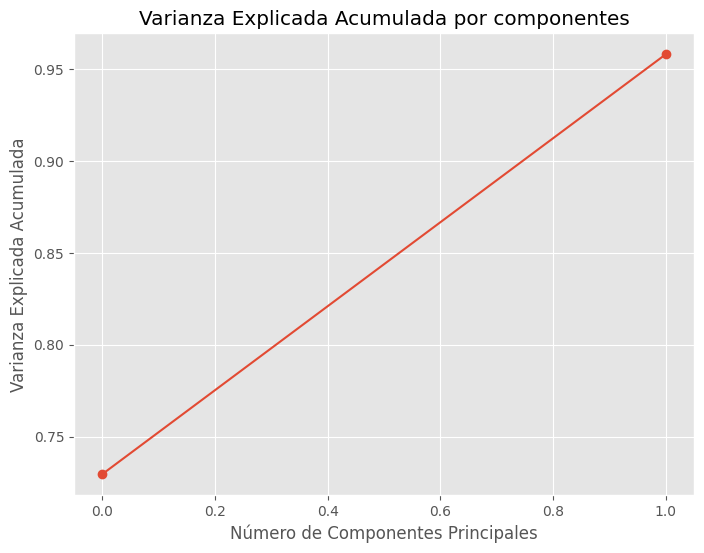

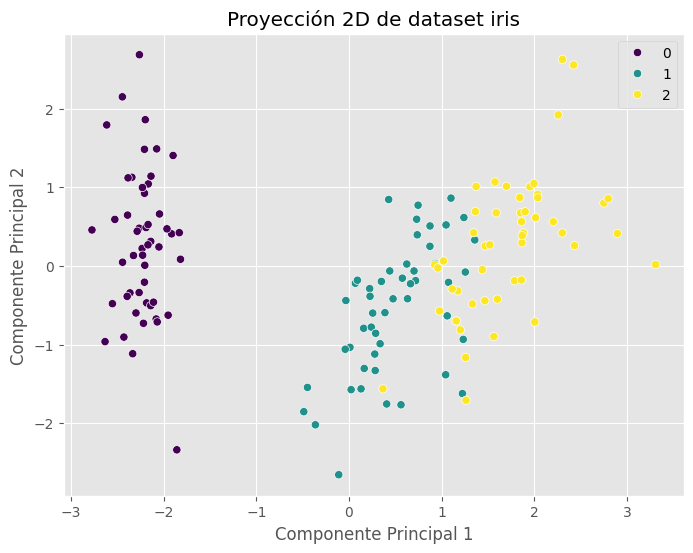


🔹 Comparación de Modelos
----------------------------------------
Accuracy sin PCA: 1.00
Accuracy con PCA: 0.91


In [8]:
#Instalaciones e importaciones
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# ESTILO VISUAL PARA CLI
class Colors:
    """Clase para guardar los códigos de color para la salida en la terminal."""
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def print_subheader(title):
    """Imprime un subencabezado estilizado."""
    print(f"\n{Colors.BOLD}{Colors.OKCYAN}🔹 {title}{Colors.ENDC}")
    print(f"{Colors.OKCYAN}{'-'*40}{Colors.ENDC}")

#Cargar datos
data = load_iris()
X = data.data
y = data.target

#Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Varianza Explicada Acumulada
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)
print_subheader("Varianza Explicada Acumulada")
print(f"Varianza Explicada por componente: {exp_var}")
print(f"Varianza Explicada Acumulada: {cum_exp_var}")

print("\n")

#Visualización Varianza Explicada
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(cum_exp_var, marker='o', linestyle='-')
plt.title('Varianza Explicada Acumulada por componentes')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

print("\n")

#Visualización datos
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Proyección 2D de dataset iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

#Modelo Logistic Regression sin PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

#Modelo Logistic Regression con PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print_subheader("Comparación de Modelos")
print(f"Accuracy sin PCA: {accuracy_original:.2f}")
print(f"Accuracy con PCA: {accuracy_pca:.2f}")

##Interpretar los resultados

1. **¿Cuánta información conserva el nuevo espacio?**

  El nuevo espacio definido por los 2 primeros componentes principales (PCA) conserva aproximadamente 95.81% de la varianza total del conjunto de datos original.

  El primer componente retiene el 72.96% de la información.

  El segundo agrega un 22.85% adicional.

  📌 Conclusión: Con sólo 2 dimensiones, se conserva casi toda la información relevante, lo cual es excelente para visualización y reducción de dimensionalidad.

\
2. **¿Se observan agrupamientos o patrones más claros?**

  Sí, claramente se observan agrupamientos bien definidos:

  El grupo etiquetado como 0 (color morado) está completamente separado de los demás.

  Los grupos 1 (verde azulado) y 2 (amarillo) muestran algo de superposición, pero aún mantienen estructuras distinguibles.

  Esto indica que:

  El PCA logró proyectar los datos de forma que las relaciones entre clases sean bastante visibles.

  Aunque hay cierta mezcla entre dos clases, los patrones son en general visualmente claros y útiles para clasificación o análisis exploratorio.

  📌 Conclusión: Sí, se observan agrupamientos claros, especialmente para una de las clases, lo que demuestra que PCA es muy efectivo en este caso.